# 3 Sum

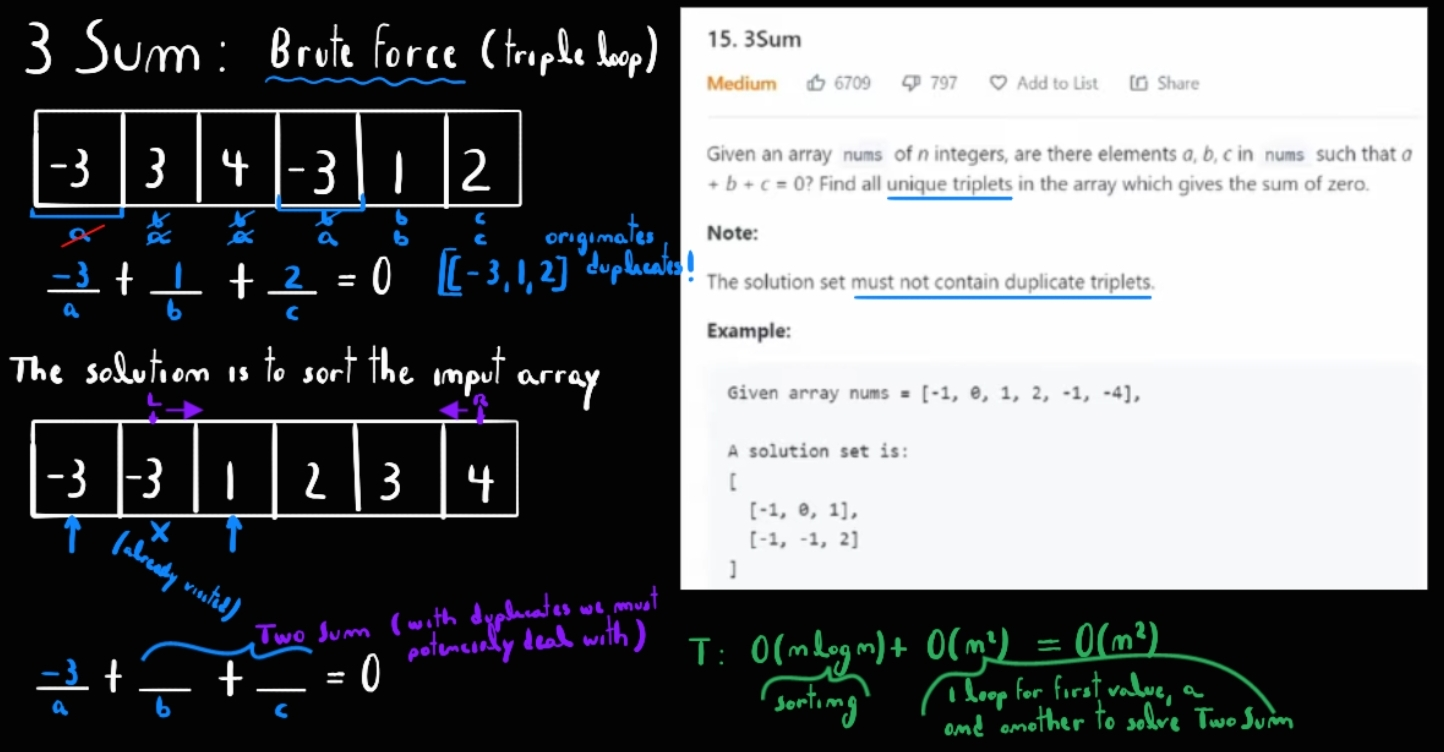

In [1]:
from typing import List


class Solution:
    def three_sum(self, nums: List[int]) -> List[List[int]]:
        res = []
        nums.sort()
        for i in range(len(nums)):
            # avoids duplicates
            if i > 0 and nums[i - 1] == nums[i]:
                continue
            l, r = i + 1, len(nums) - 1
            while l < r:
                curr_sum = nums[i] + nums[l] + nums[r]
                if curr_sum > 0:
                    r -= 1
                elif curr_sum < 0:
                    l += 1
                else:
                    res.append([nums[i], nums[l], nums[r]])
                    # still need to update the pointers
                    # only one of them as the other will
                    # update in the conditions above
                    l += 1
                    # need to update pointers in case we have
                    # duplicates in the two-sum subproblem
                    while nums[l - 1] == nums[l] and l < r:
                        l += 1
        return res


sol = Solution()
sol.three_sum([-3, 3, 4, -3, 1, 2])

[[-3, 1, 2]]

# Longest Palindromic Substring

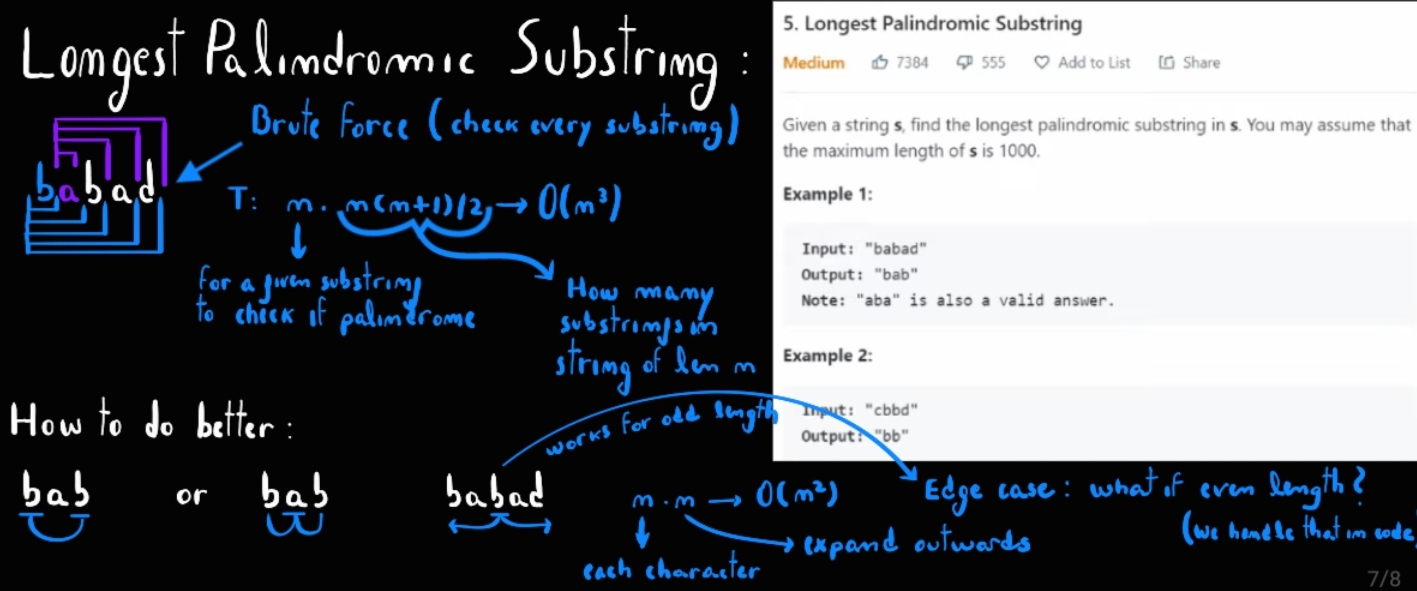

In [ ]:
from typing import List


class Solution:
    def longest_palindrome(self, s: str) -> str:
        res = ""
        res_len = 0
        for i in range(len(s)):
            # odd length
            l, r = i, i
            # check in bounds of string and still palindrome
            while l >= 0 and r < len(s) and s[l] == s[r]:
                # r-l+1 gives len of current str
                if (r - l + 1) > res_len:
                    res = s[l : r + 1]
                    res_len = r - l + 1
                l -= 1
                r += 1
            # even length
            l, r = i, i + 1
            # check in bounds of string and still palindrome
            while l >= 0 and r < len(s) and s[l] == s[r]:
                # r-l+1 gives len of current str
                if (r - l + 1) > res_len:
                    res = s[l : r + 1]
                    res_len = r - l + 1
                l -= 1
                r += 1
        return res


sol = Solution()
sol.longest_palindrome("babad")

# Longest Substring without repeating characters

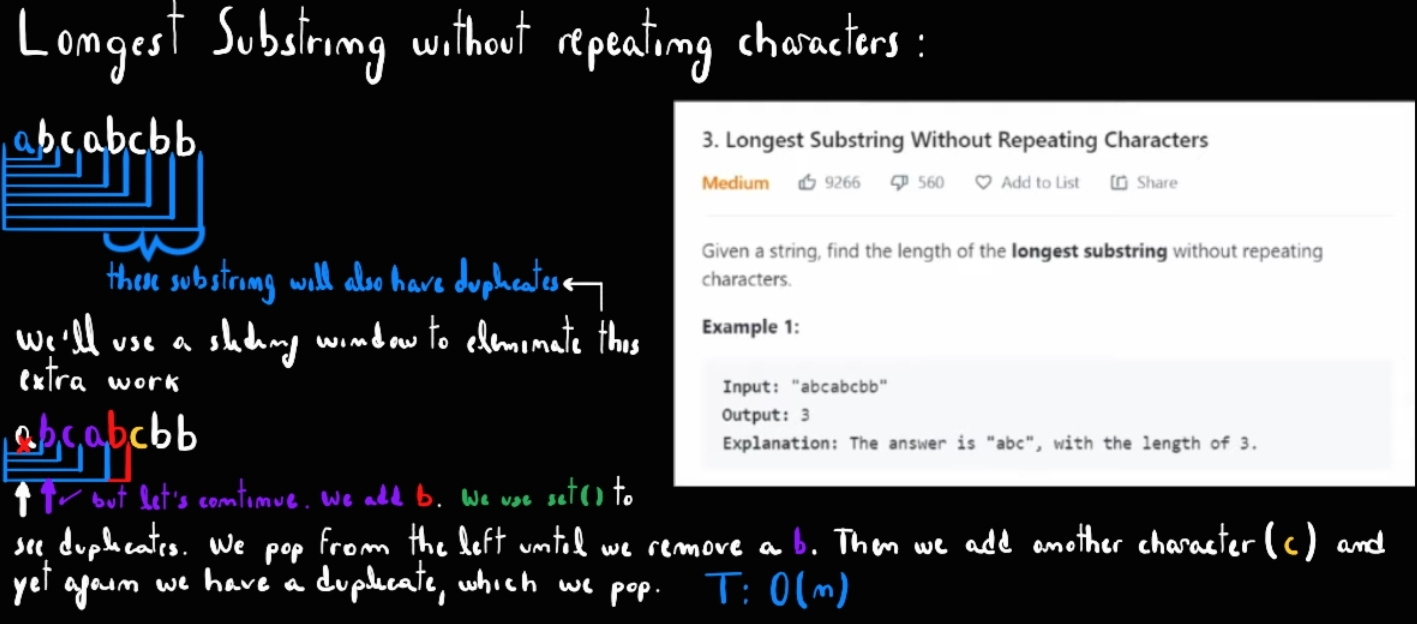

In [ ]:
from typing import List


class Solution:
    def length_longest_substring(self, s: str) -> int:
        char_set = set()
        l = 0
        res = 0
        for r in range(len(s)):
            # detect and remove chars until no more duplicates
            while s[r] in char_set:
                char_set.remove(s[l])
                l += 1
            # after kicking out all duplicates from the set, add
            # the recent char
            char_set.add(s[r])
            res = max(res, r - l + 1)
        return res


sol = Solution()
sol.length_longest_substring("abcdefffffff")

# Add Two Numbers

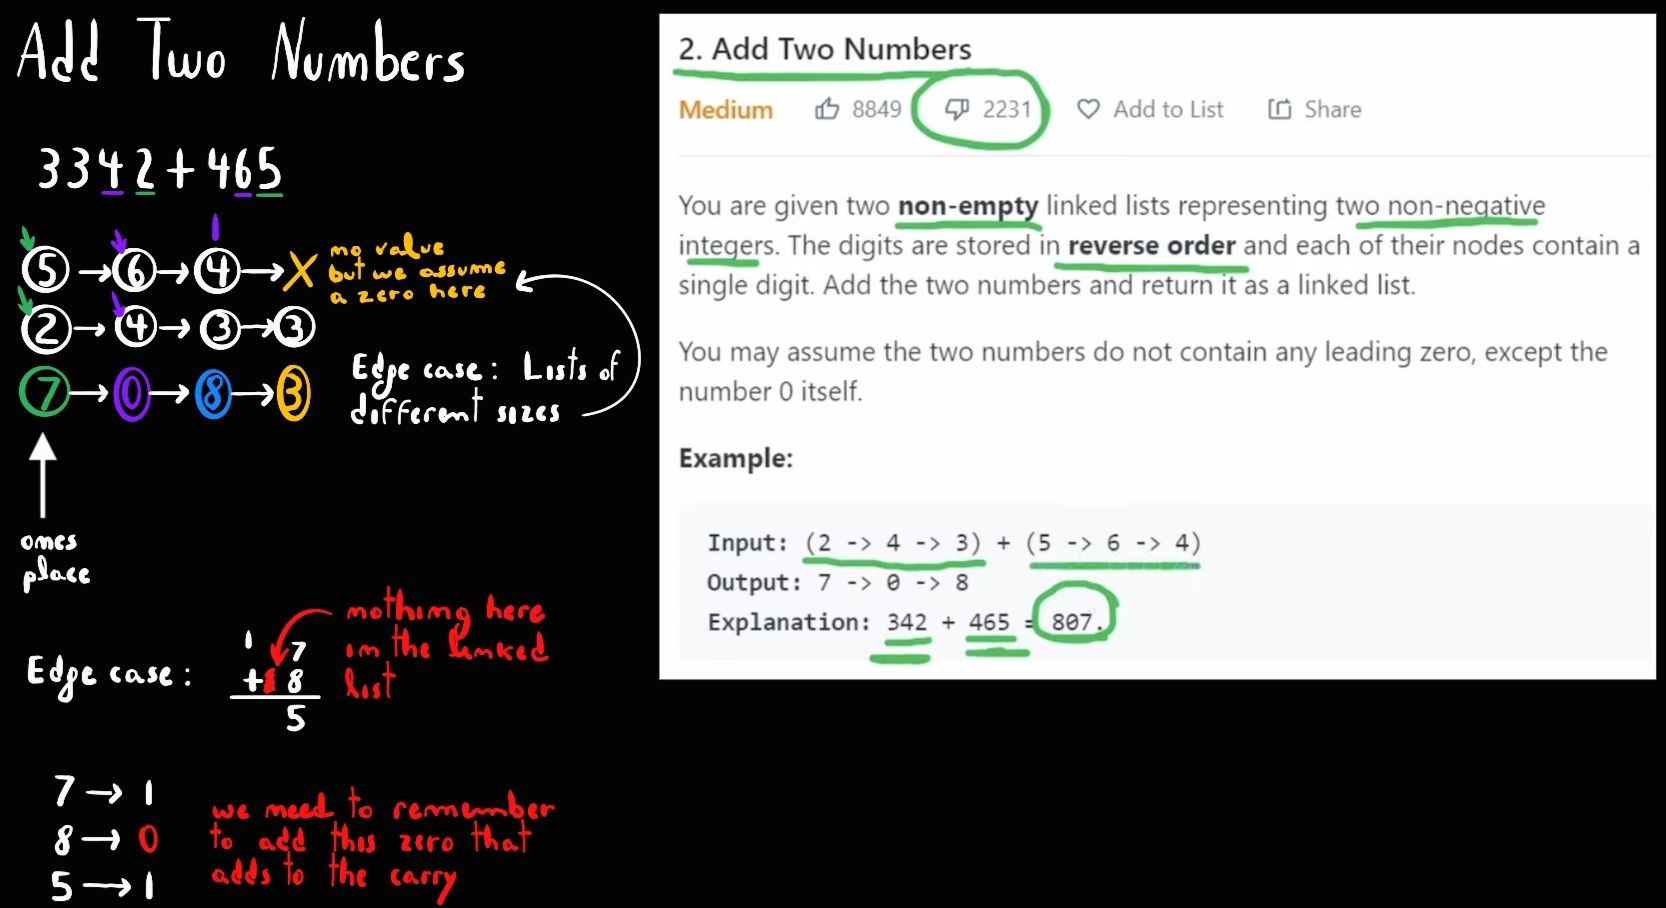

In [ ]:
from typing import List


# Definition for singly linked list
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

    def visualize(self):
        nodes = []
        cur = self
        while cur:
            nodes.append(str(cur.val))
            cur = cur.next
        return " -> ".join(nodes) + " -> None"


class Solution:
    def add_two_numbers(self, l1: ListNode, l2: ListNode) -> ListNode:
        # the dummy node is used to simplify the handling of the head node
        # in the resulting linked list. the dummy ensures there's always a
        # "previous" node (cur) to attach new nodes to via cur.next
        # all new nodes are appended to cur.next, whether it's the first node,
        # middle node, or last node
        dummy = ListNode()
        cur = dummy
        # carry initializes to zero to deal with the different sizes edge case
        carry = 0
        # or carry deals with the 7+8 edge case because l1 and l2 would be null
        # hence v1 and v2 would be 0 and the loop would stop, leaving the carry
        while l1 or l2 or carry:
            v1 = l1.val if l1 else 0
            v2 = l2.val if l2 else 0
            # new digit
            val = v1 + v2 + carry
            # imagine 'val' is 15 for example - a 2 digit number
            # we need to get the carry out of that
            carry = val // 10
            # and this will give us the ones place
            val = val % 10
            cur.next = ListNode(val)
            # update pointers
            cur = cur.next
            l1 = l1.next if l1 else None
            l2 = l2.next if l2 else None
        # dummy is not part of the result but we attach the cur to it and access
        #
        return dummy.next


sol = Solution()
sol.add_two_numbers(ListNode(243), ListNode(564)).visualize()

# Search in Rotated Sorted Array

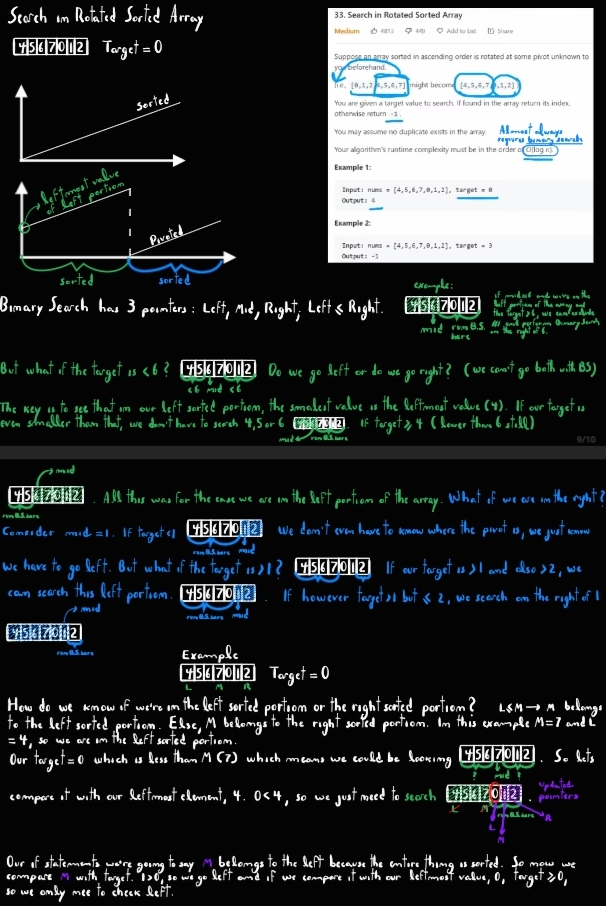

In [ ]:
from typing import List


class Solution:
    def search(self, nums: List[int], target: int) -> int:
        left, right = 0, len(nums) - 1
        # <= and not < because we could get an array like [1] and in that case right == left
        # but we still need to check that one value
        while left <= right:
            mid = (left + right) // 2
            if target == nums[mid]:
                return mid
            # mid is on the left sorted portion
            if nums[left] <= nums[mid]:
                if target > nums[mid]:
                    # we search right (most basic case)
                    left = mid + 1
                # target < nums[mid] but also target < nums[left]
                elif target < nums[left]:
                    # we search right (the array looks like ie. [4,5,6,7,0,1,2,3] where 0 is target and mid is 7)
                    left = mid + 1
                # means target < nums[mid] but also target >= nums[left]. (the array looks like ie. [4,5,6,7,0,1,2,3] where 4 is target and mid is 7)
                else:
                    # we search left in this case
                    right = mid - 1
            # mid is on the right sorted portion
            else:
                # we search left (most basic case)
                if target <= nums[mid]:
                    right = mid - 1
                # target > nums[mid] but also > nums[right]
                elif target > nums[right]:
                    # we search left (the array looks like ie. [4,5,6,7,0,1,2,3] where 4 is target and mid is 1)
                    right = mid - 1
                # target > nums[mid] but also target <= nums[right] (the array looks like ie. [4,5,6,7,0,1,2,3] where 3 is target and mid is 1)
                else:
                    left = mid + 1
        return -1


sol = Solution()
sol.search([1, 2, 3, 4, 5, 0], 4)

3

# Container with the Most Water

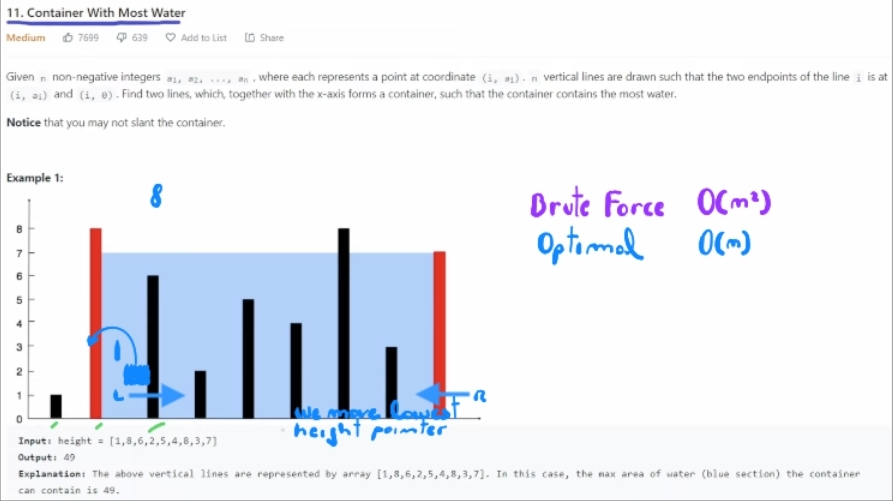

In [1]:
from typing import List


class Solution:
    def max_area_brute_force(self, height: List[int]) -> int:
        res = 0
        for l in range(len(height)):
            for r in range(l + 1, len(height)):
                area = (r - l) * min(height[l], height[r])
                res = max(res, area)
        return res

    def max_area_optimal(self, height: List[int]) -> int:
        res = 0
        l, r = 0, len(height) - 1
        while l < r:
            area = (r - l) * min(height[l], height[r])
            res = max(res, area)
            if height[l] < height[r]:
                l += 1
            else:
                r -= 1
        return res


sol = Solution()
# sol.max_area_brute_force([1, 8, 6, 2, 5, 4, 8, 3, 7])
sol.max_area_optimal([1, 8, 6, 2, 5, 4, 8, 3, 7])

49

# Rotate Image

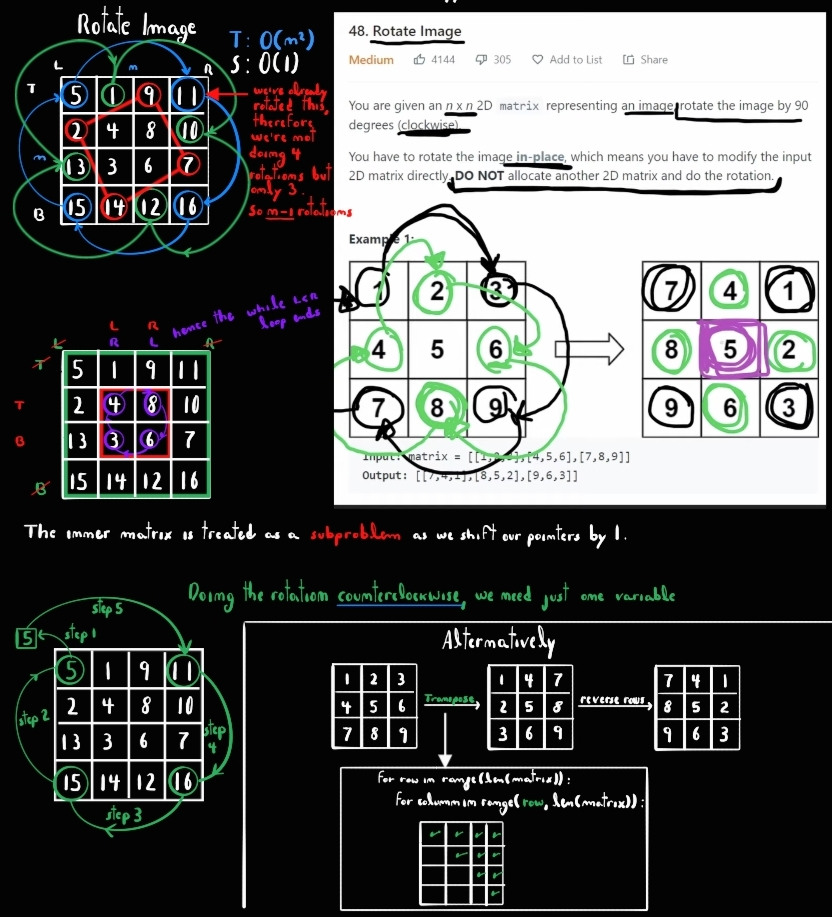

In [ ]:
from typing import List


class Solution:
    def rotate_layer_by_layer(self, matrix: List[List[int]]) -> int:
        """We don't return anything, modify inplace instead"""
        l, r = 0, len(matrix) - 1
        while l < r:
            # see diagram to understand that we need only n-1 rotations, not n
            # note range(r-l) is equivalent to range(l,r)
            for i in range(l, r):
                # top and bottom = left and right respectively because we have a square
                # matrix
                # this will complete a layer of rotation
                t, b = l, r
                # step 1 - save the top left value
                top_left = matrix[t][l + i]
                # step 2 - move bottom left into top left
                matrix[t][l + i] = matrix[b - i][l]
                # step 3 - move bottom right into bottom left
                matrix[b - i][l] = matrix[b][r - i]
                # step 4 - move top right into bottom right
                matrix[b][r - i] = matrix[t + i][r]
                # step 5 - move top_left temp variable into top right
                matrix[t + i][r] = top_left
            # we now shift the pointers to get the inner matrix
            r -= 1
            l += 1
        print(matrix)

    def rotate_with_transpose(self, matrix: List[List[int]]) -> int:
        """We don't return anything, modify inplace instead"""
        # transpose the matrix
        for row in range(len(matrix)):
            # the second loop loops at and above the main diagonal
            # this is because we don't want to swap twice
            for col in range(row, len(matrix)):
                temp = matrix[row][col]
                matrix[row][col] = matrix[col][row]
                matrix[col][row] = temp
        # reverse rows
        for row in matrix:
            row.reverse()
        print(matrix)


sol = Solution()
sol.rotate_layer_by_layer(
    [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]]
)
sol.rotate_with_transpose(
    [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]]
)

[[13, 9, 5, 1], [14, 10, 6, 2], [15, 11, 7, 3], [16, 12, 8, 4]]
[[13, 9, 5, 1], [14, 10, 6, 2], [15, 11, 7, 3], [16, 12, 8, 4]]


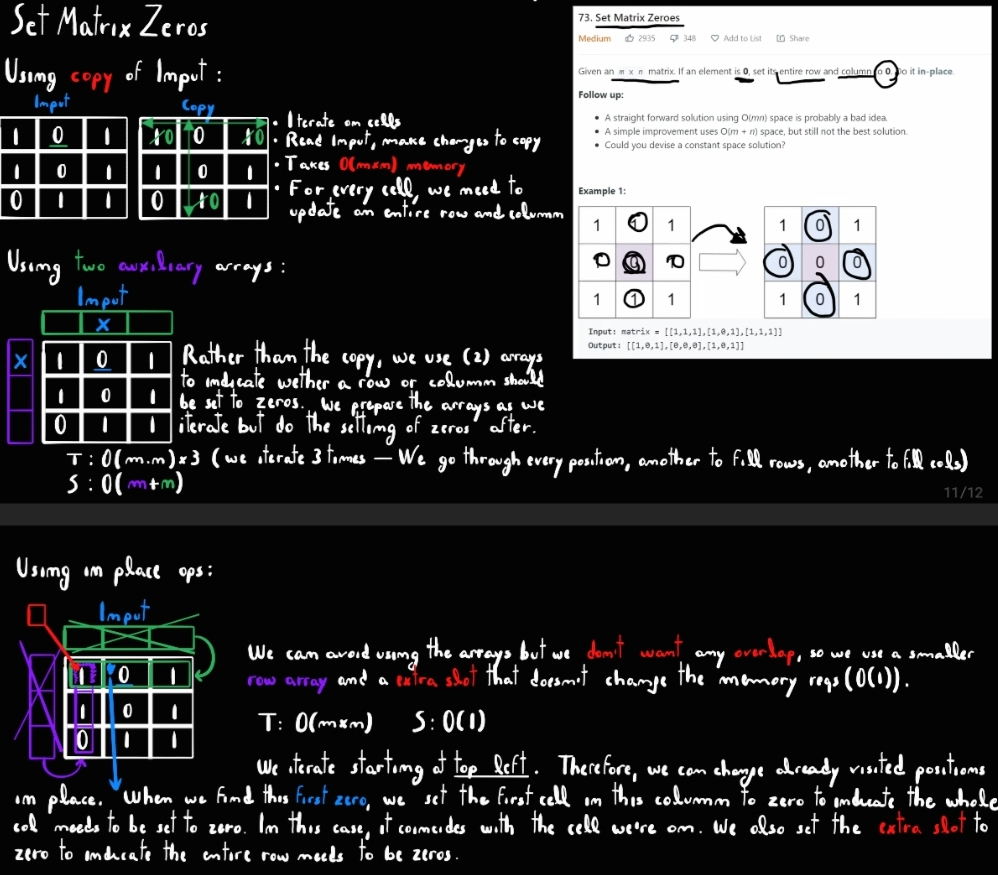

In [2]:
from typing import List


class Solution:
    def set_zero(self, matrix: List[List[int]]) -> None:
        # O(1) memory solution (O(m*n) time)
        ROWS = len(matrix)
        COLS = len(matrix[0])
        row_zero = False
        # determine which rows/cols need to be zeroed
        for r in range(ROWS):
            for c in range(COLS):
                # if we find a zero, we're gonna set the first row to zero
                # and the first col to zero, exception to row zero.
                # this sets some of the intended cells to zero but above all
                # it marks the rows and cols to be set to zero
                if matrix[r][c] == 0:
                    matrix[0][c] = 0
                    if r > 0:
                        matrix[r][0] = 0
                    else:
                        row_zero = True
        # we will now loop again and actually set the intended targets to zero
        # we skip the first row and column as we will handle that after
        for r in range(1, ROWS):
            for c in range(1, COLS):
                if matrix[0][c] == 0 or matrix[r][0] == 0:
                    matrix[r][c] = 0
        # zero out the first column if we need to
        if matrix[0][0] == 0:
            for r in range(ROWS):
                matrix[r][0] = 0
        # zero out the first row if we need to
        if row_zero:
            for c in range(COLS):
                matrix[0][c] = 0
        print(matrix)


sol = Solution()
sol.set_zero([[1, 1, 1], [1, 0, 1], [1, 1, 1]])

[[1, 0, 1], [0, 0, 0], [1, 0, 1]]


# LRU Cache

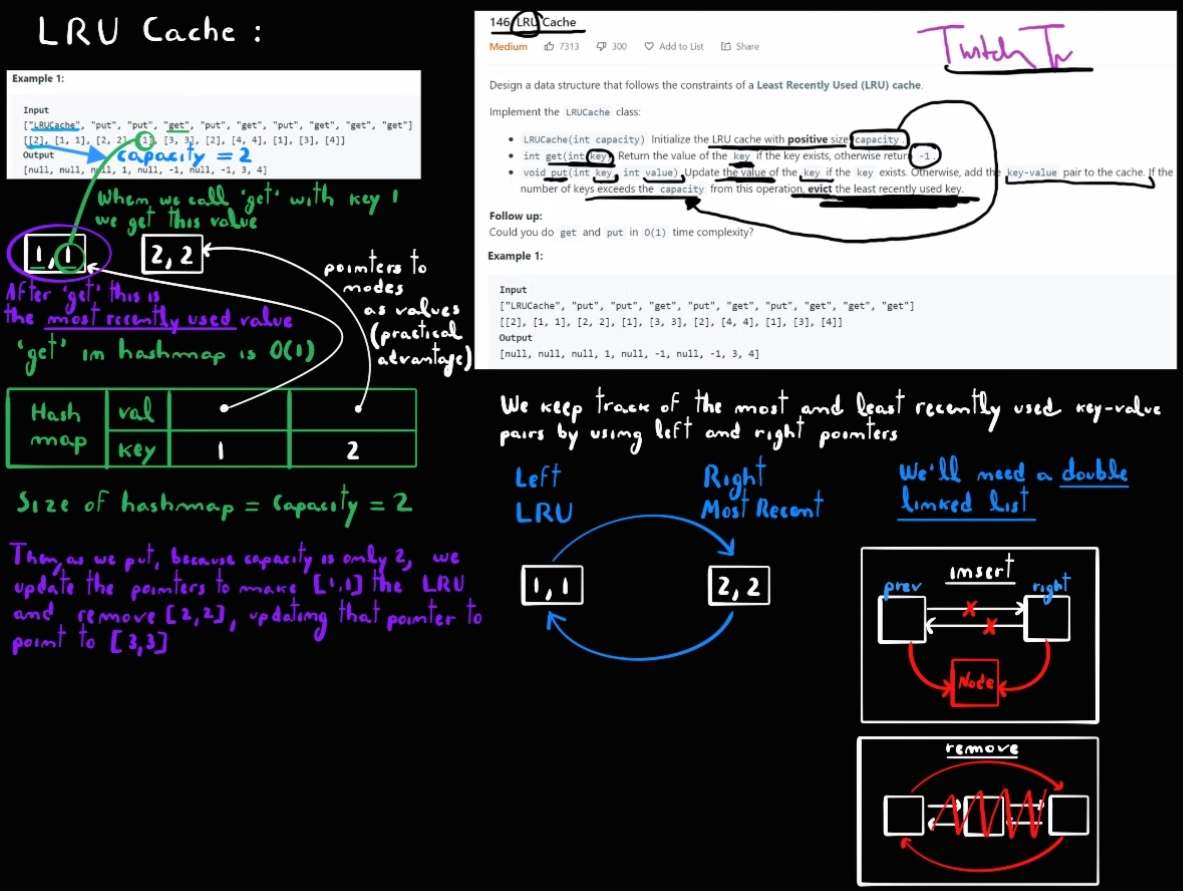

In [ ]:
class Node:
    def __init__(self, key, val):
        self.key, self.val = key, val
        self.prev = self.next = None


class LRUCache:
    def __init__(self, capacity: int):
        self.cap = capacity
        self.cache = {}  # maps key to nodes
        self.left, self.right = Node(0, 0), Node(0, 0)
        # we want to initially have left and right connected
        # to each other because new nodes go in the middle
        # between left and right
        # left=LRU, right=most recent
        self.left.next, self.right.prev = self.right, self.left

    # remove node from list
    def remove(self, node):
        prv, nxt = node.prev, node.next
        prv.next, nxt.prev = nxt, prv

    # insert right before our right pointer
    def insert(self, node):
        prv, nxt = self.right.prev, self.right
        prv.next = nxt.prev = node
        node.next, node.prev = nxt, prv

    def get(self, key: int) -> int:
        if key in self.cache:
            self.remove(self.cache[key])
            self.insert(self.cache[key])
            # each key mapped to a node
            return self.cache[key].val
        return -1

    def put(self, key: int, value: int) -> None:
        # if already in the cache we remove it
        if key in self.cache:
            self.remove(self.cache[key])
        # make a new node with the key and value
        self.cache[key] = Node(key, value)
        self.insert(self.cache[key])
        if len(self.cache) > self.cap:
            # remove from the list and delete the LRU from the hashmap
            lru = self.left.next
            self.remove(lru)
            del self.cache[lru.key]